# Assignment # 03 Data Scavenger Hunt

## Teammembers:

- Ali Khalid (ak5013)
- Muhammad Raees (mr2714)
- Kaleem Nawaz Khan (kk5271)

### **Table of Contents** <a class="anchor" id="0.1"></a>

- [Code Portion](#jup)
- [Essay](#num)

***

## Code Portion <a class="anchor" id="jup"></a>

### Part 1 – Loading Data in Python

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_waveforms(LA, RV, RA) :
    infile = open('waveforms.csv', 'r')

    line = infile.readline()
    wf = 0

    while line :
        line = line.strip()
        data = line.split(',')

        for i in range(0, len(data)) : 
            data[i] = float(data[i])

        if(wf == 0) :
            LA.append(data)
        elif(wf == 1) :
            RV.append(data)
        elif(wf == 2) :
            RA.append(data)
        
        wf = (wf + 1) % 3
        line = infile.readline()

    infile.close()
    
def read_times(TL, TR) :
    infile = open('times.csv', 'r')
    line = infile.readline()
    data = line.strip().split(',')

    for i in range(0, len(data)) : 
        data[i] = float(data[i])*1000

    TL.append(data)

    line = infile.readline()
    data = line.strip().split(',')

    for i in range(0, len(data)) : 
        data[i] = float(data[i])*1000

    TR.append(data)
    infile.close()

### Part 2 - Data Manipulation and Visualization

In [12]:
def plot_waveforms(LA, RV, RA, TL, TR) :
    num_instances = len(LA)
    for i in range(0, num_instances) :
        plt.subplot( 311 )
        plt.plot(TL, LA[i, :])
        plt.title('Waveform for Instance '+ str(i+1))
        plt.ylabel('Lin Accel (g)')
        plt.xticks(np.arange(0, 55, step=5))
        plt.subplot( 312 )
        plt.plot(TR, RV[i, :])
        plt.ylabel('Rot Vel (rad/sec)')
        plt.xticks(np.arange(0, 55, step=5))
        plt.subplot( 313 )
        plt.plot(TR, RA[i, :])
        plt.xlabel('Time (ms)')
        plt.ylabel('Rot Accel^2 (rad/sec)')
        plt.xticks(np.arange(0, 55, step=5))
        plt.savefig('Instance ' + str(i + 1) + '.png')
        plt.show()
        plt.close()

In [13]:
# make empty data and time Lists
LA_list = []
RV_list = []
RA_list = []
TL_list = []
TR_list = []

# Run the fns
read_waveforms(LA_list, RV_list, RA_list)
read_times(TL_list, TR_list)

# convert all data and time lists to numpy arrays for plotting
LA = np.array(LA_list)
RV = np.array(RV_list)
RA = np.array(RA_list)
TL = np.array(TL_list[0])
TR = np.array(TR_list[0])

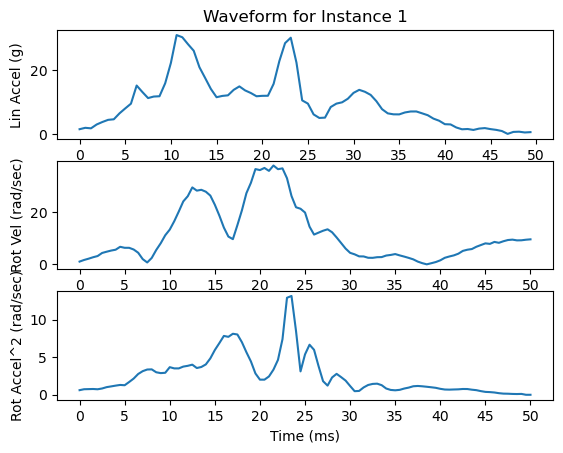

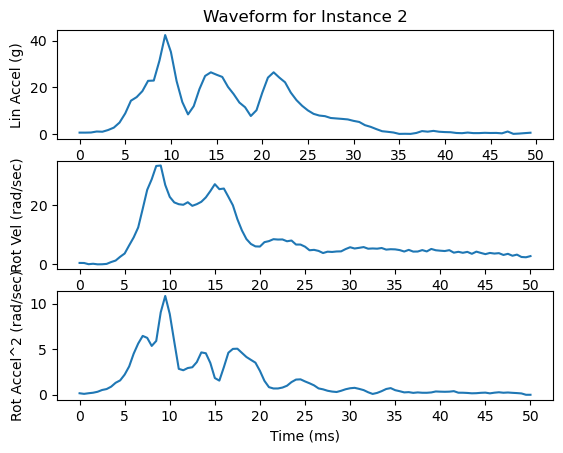

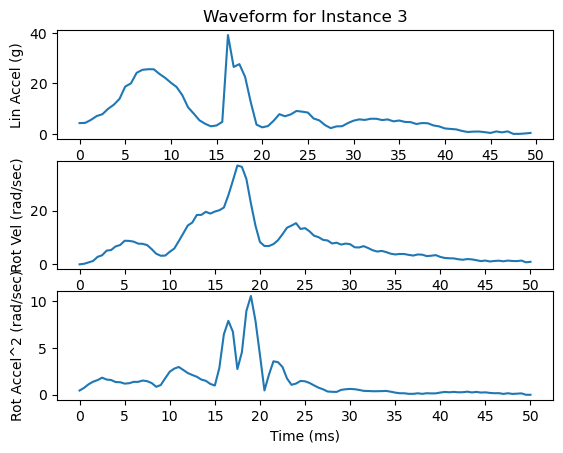

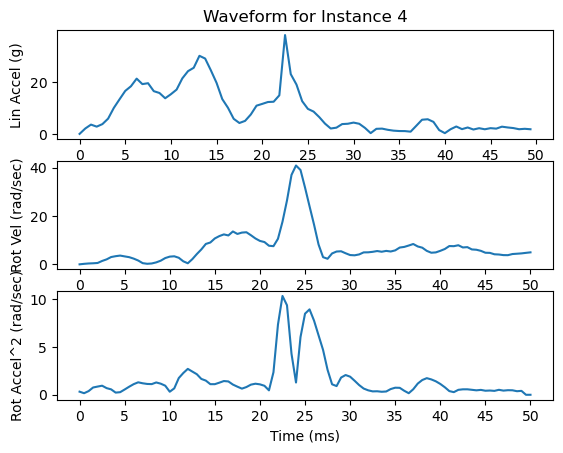

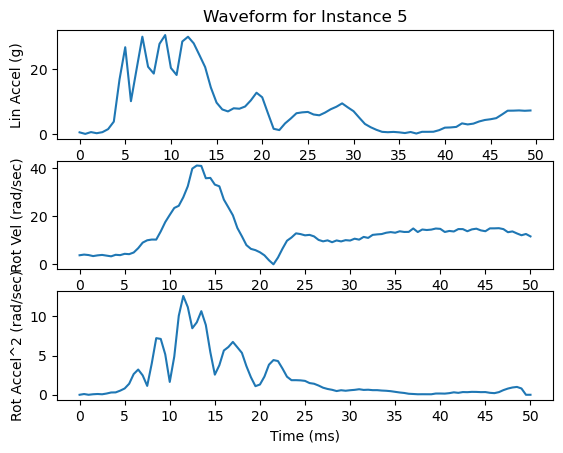

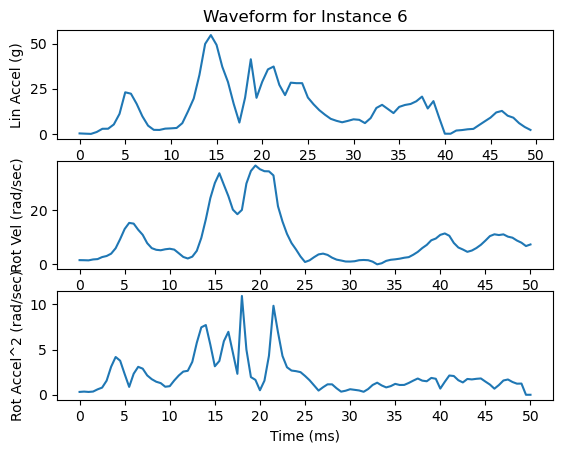

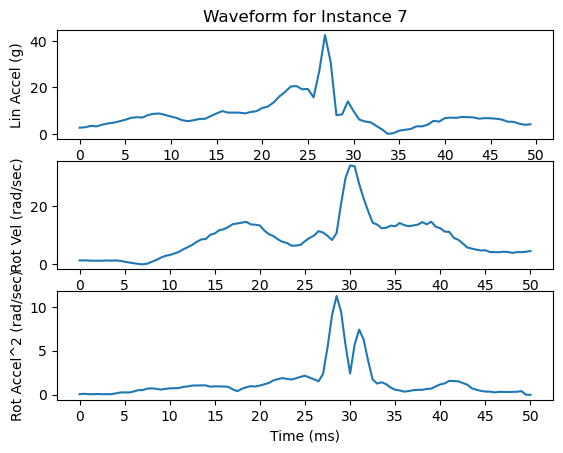

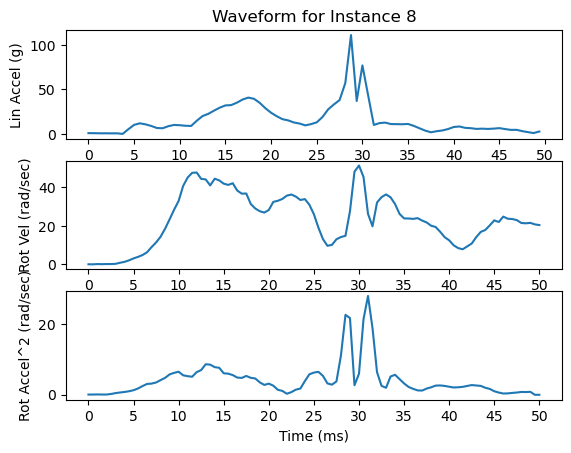

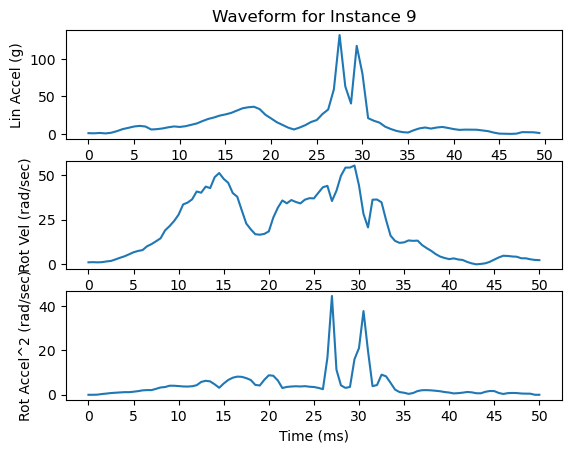

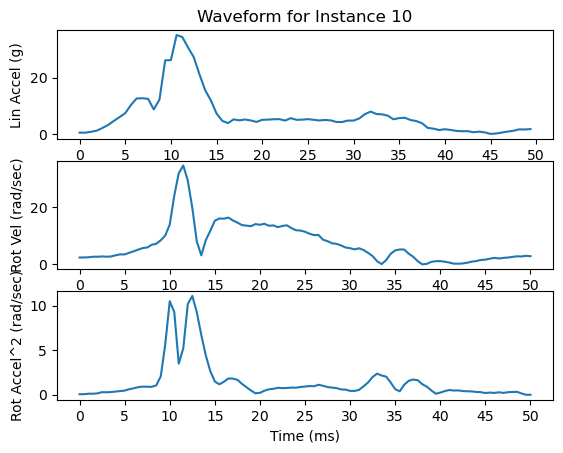

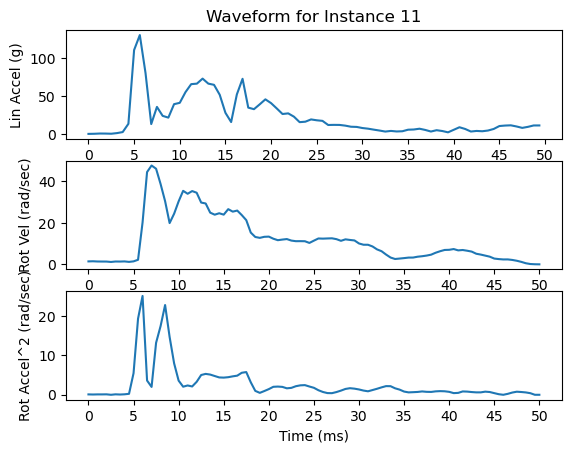

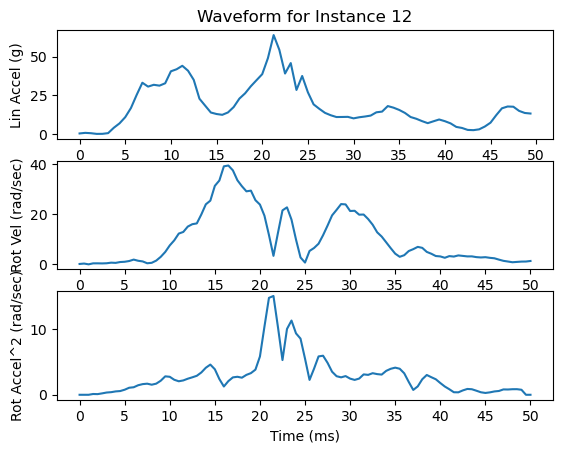

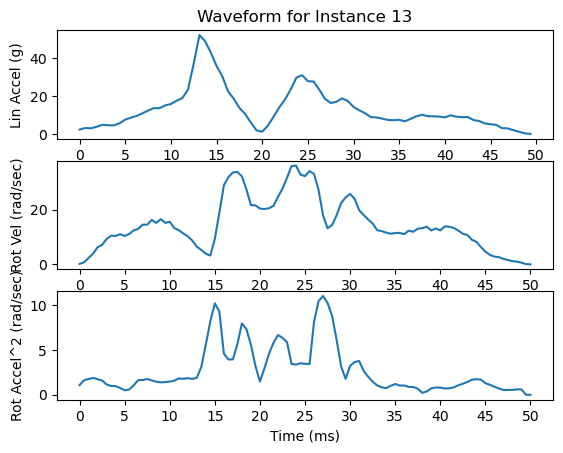

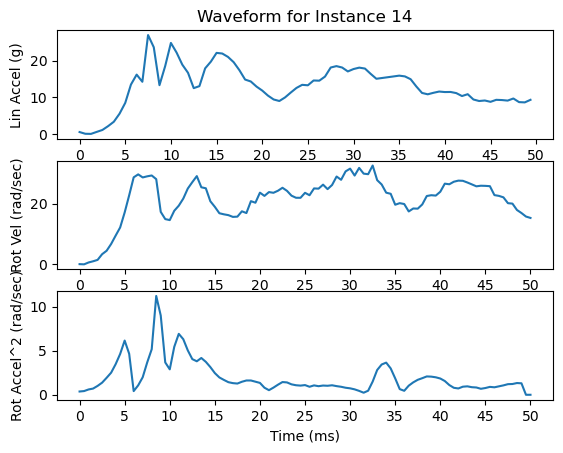

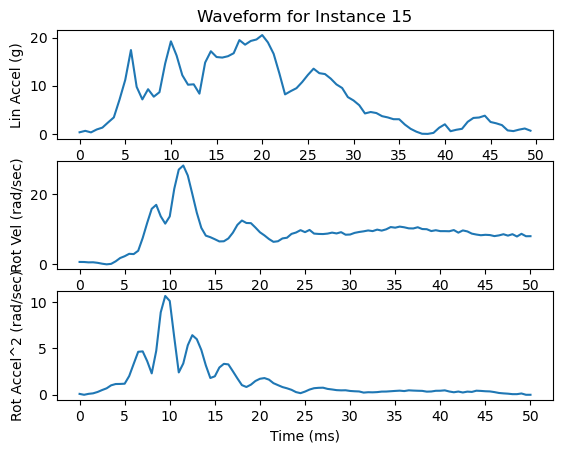

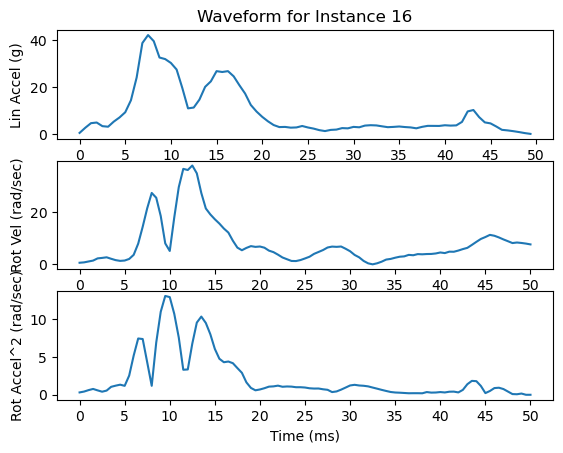

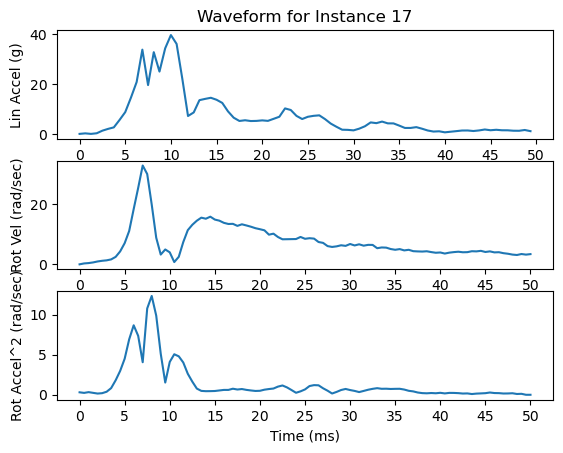

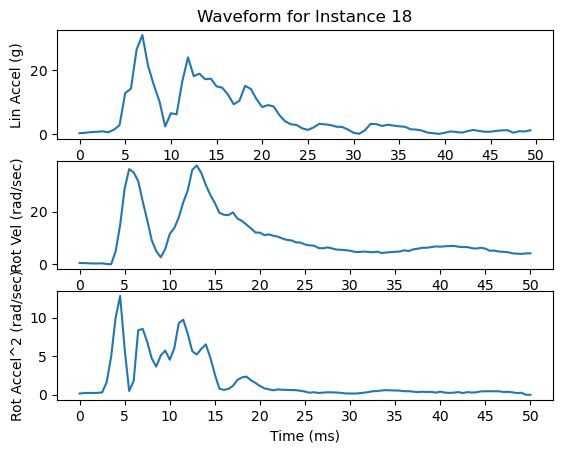

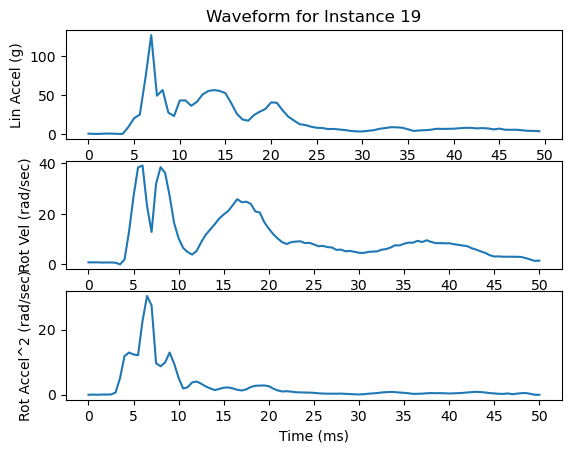

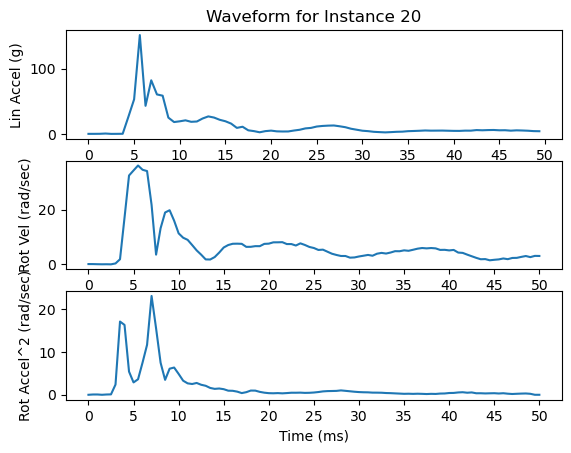

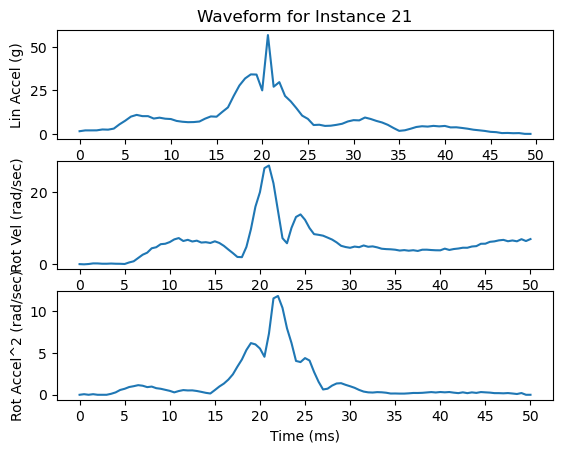

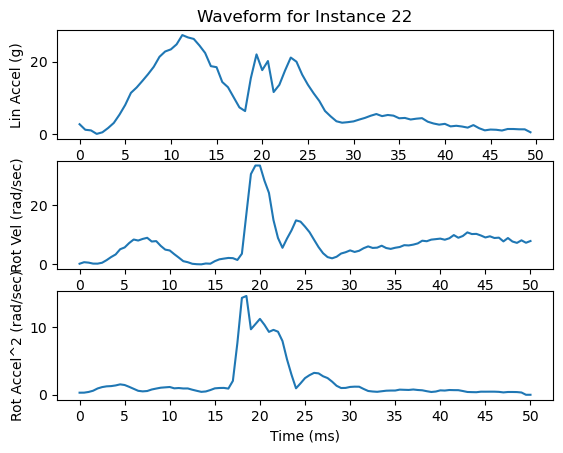

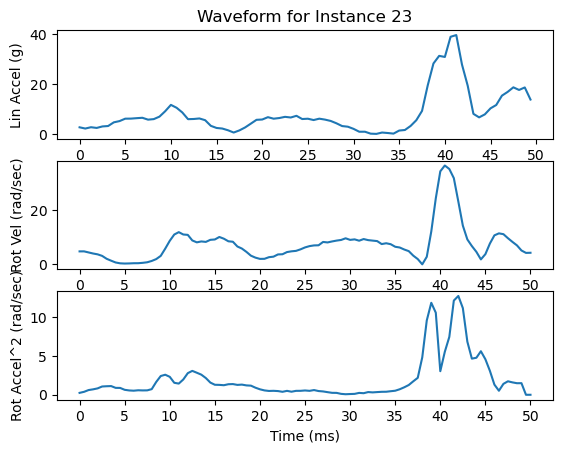

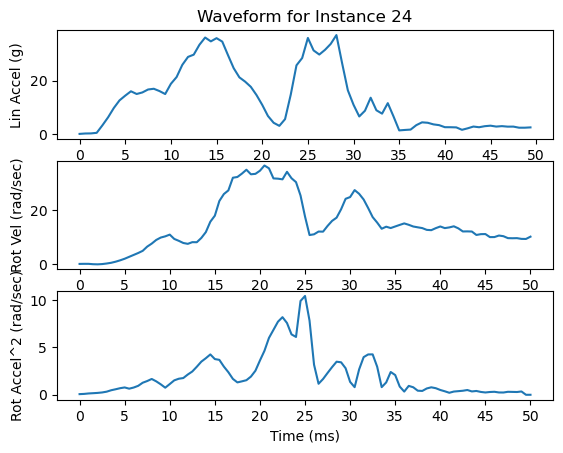

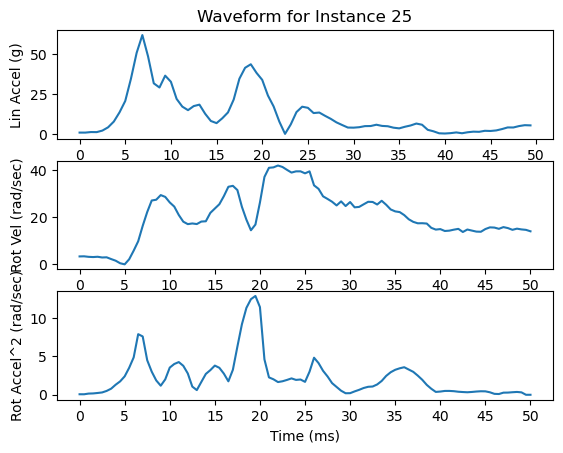

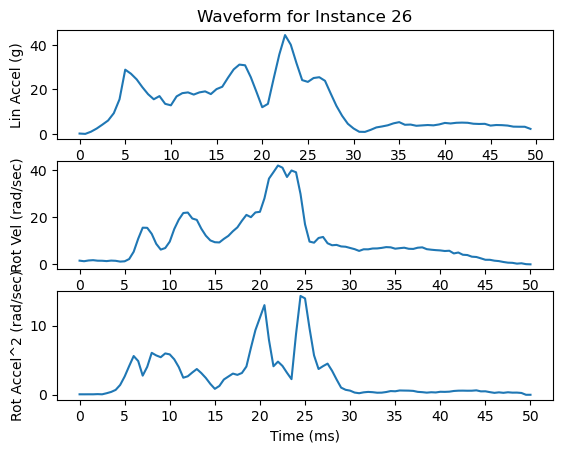

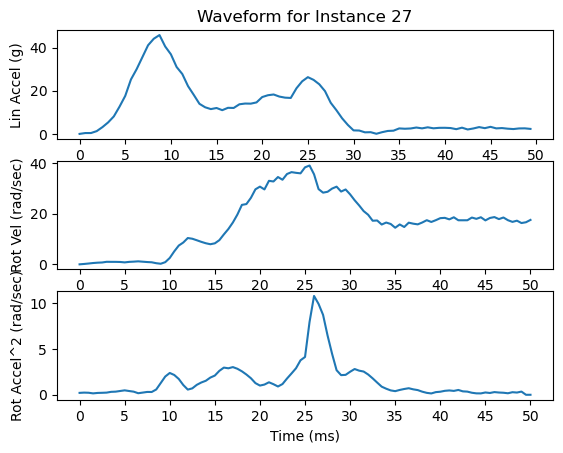

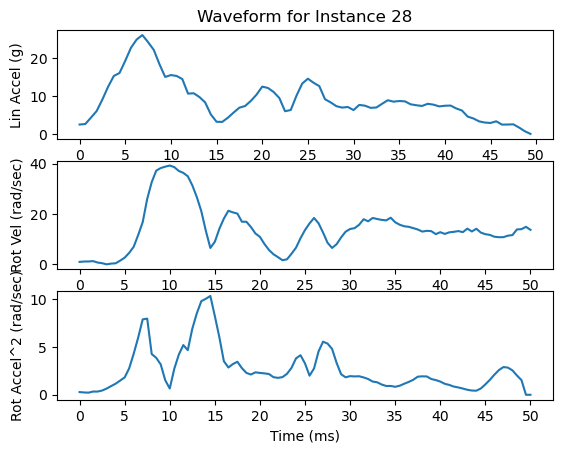

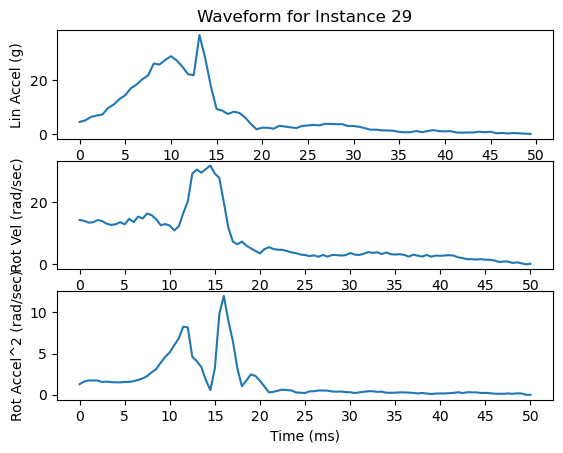

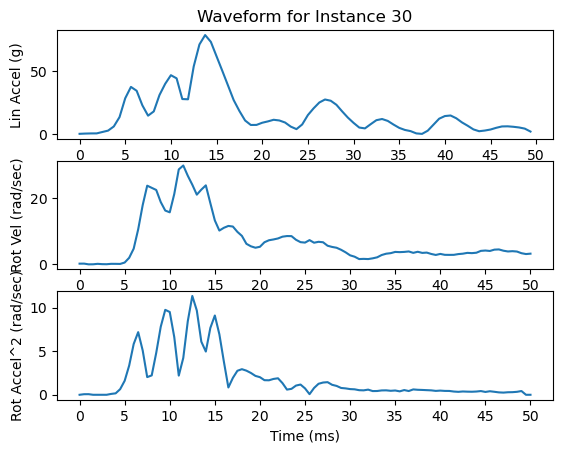

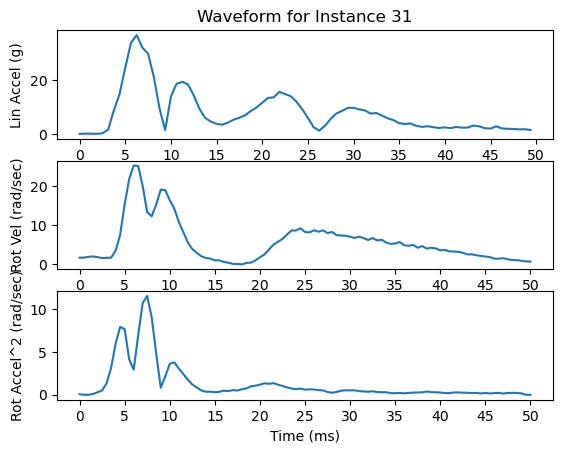

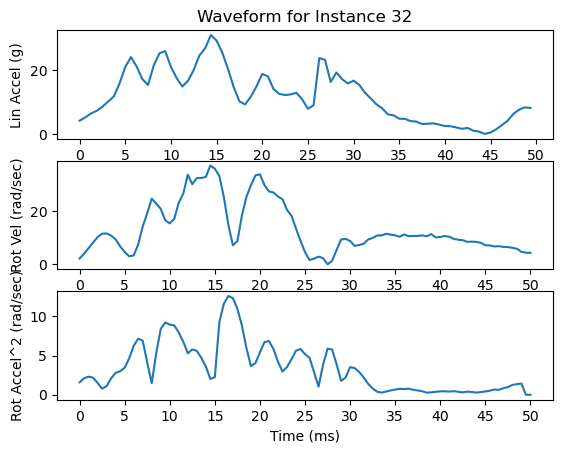

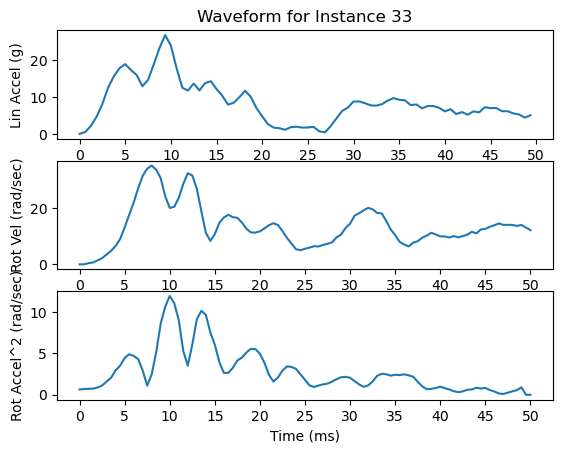

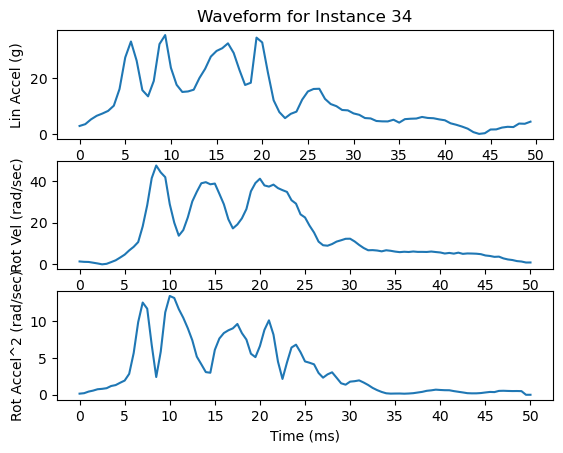

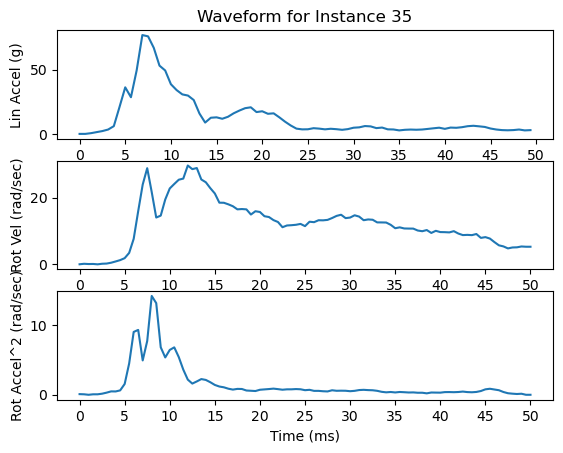

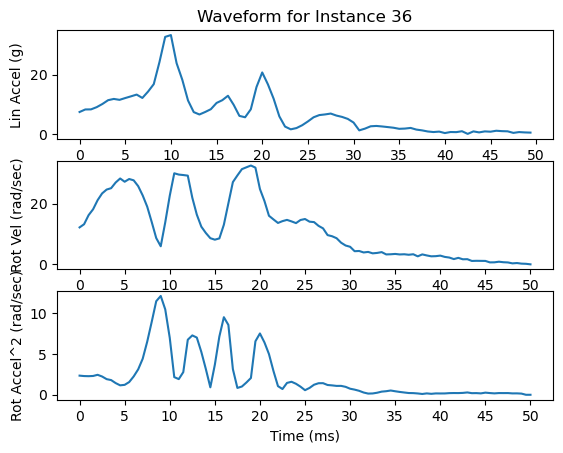

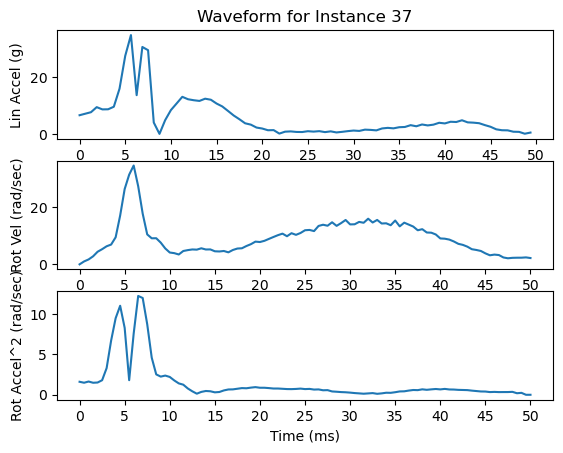

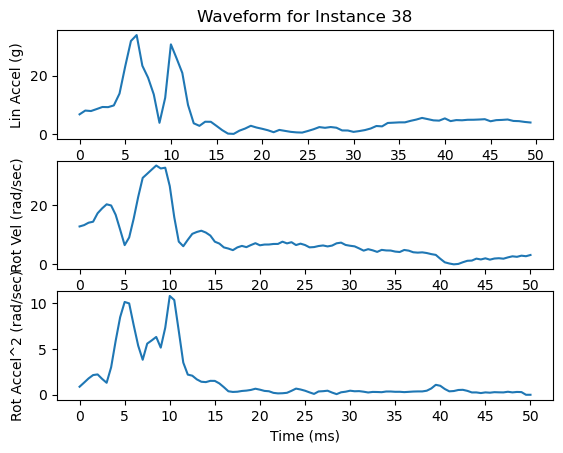

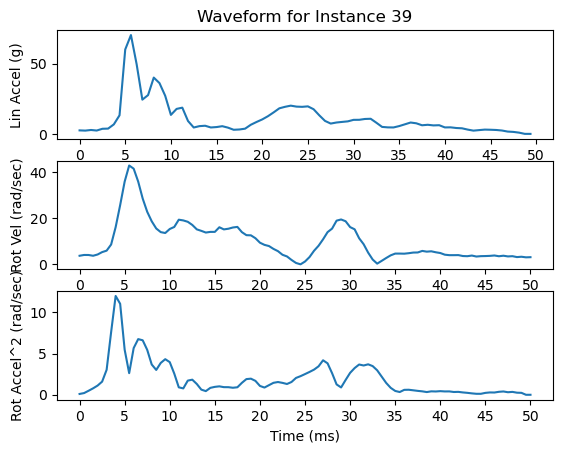

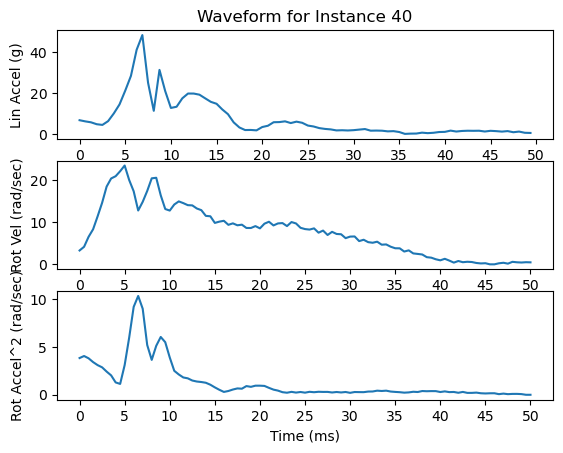

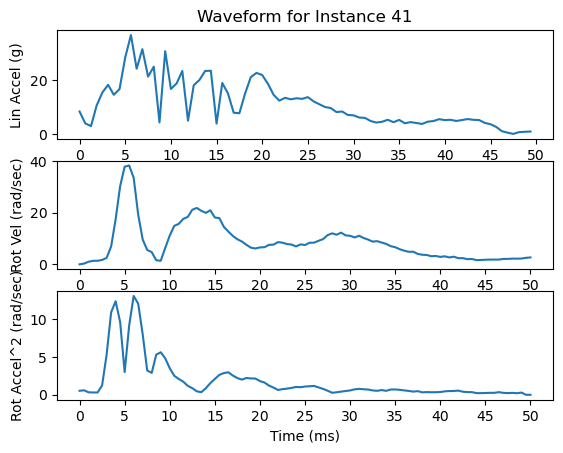

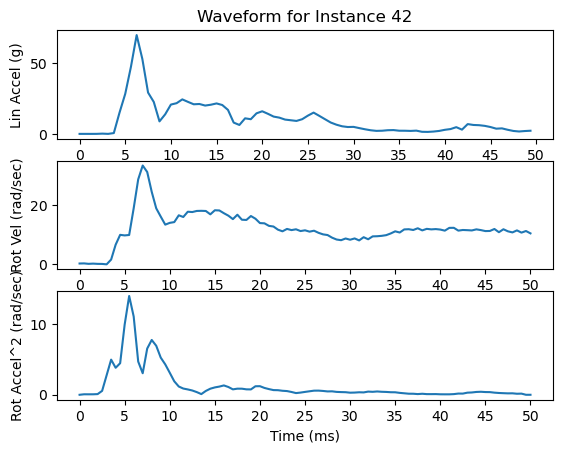

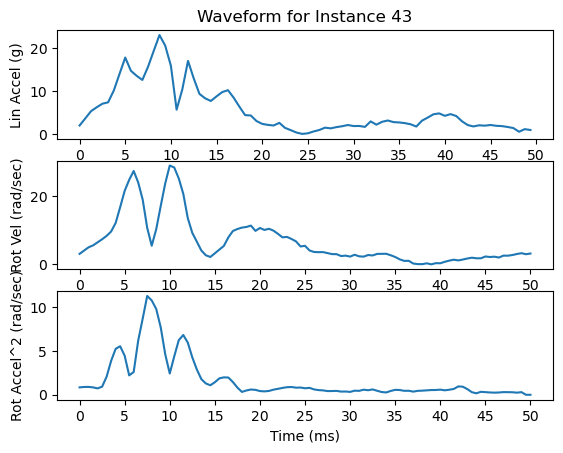

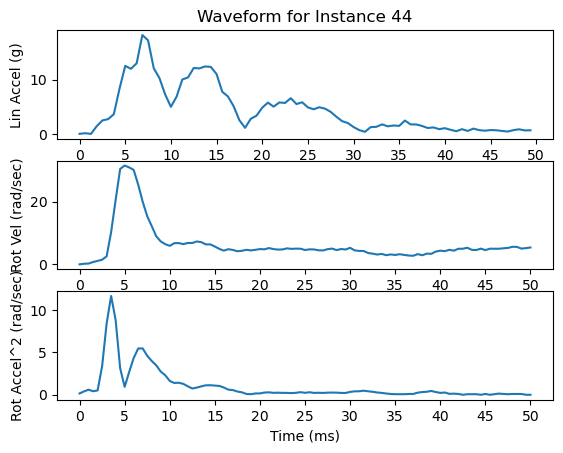

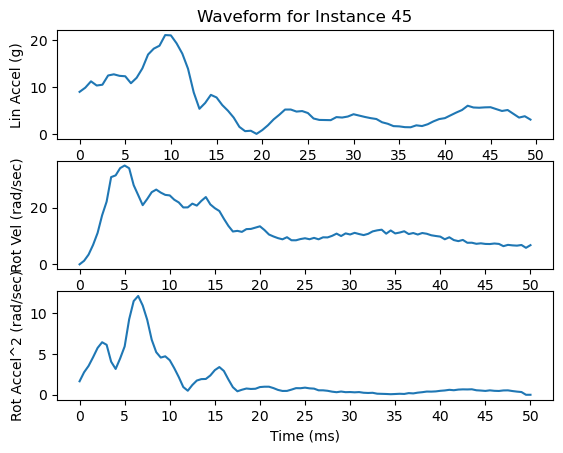

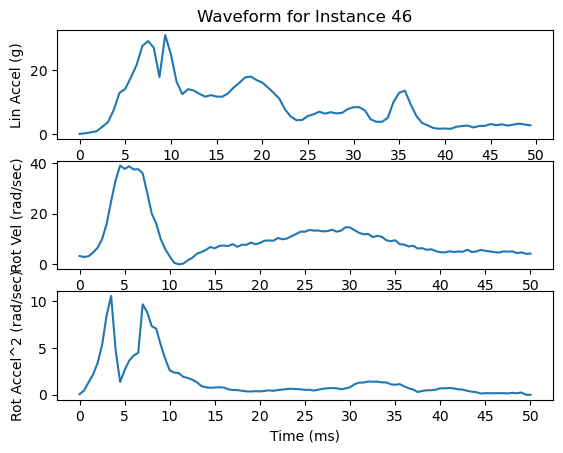

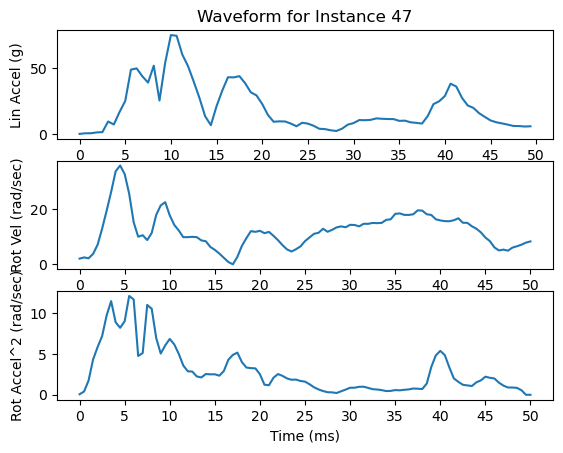

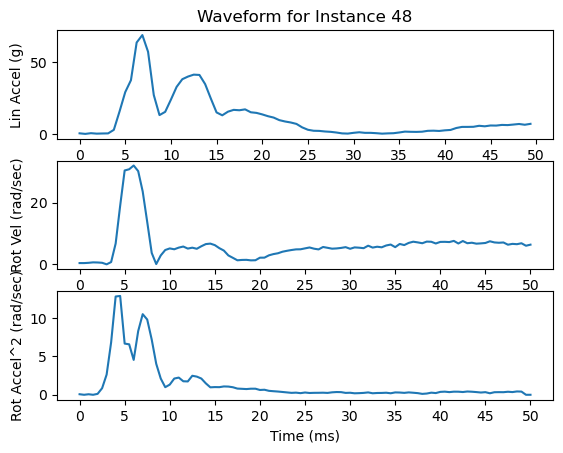

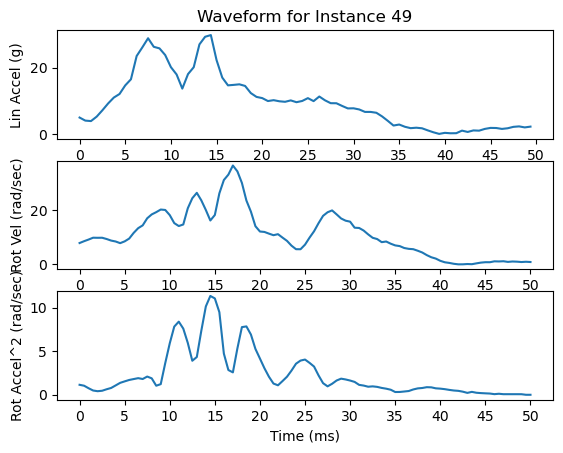

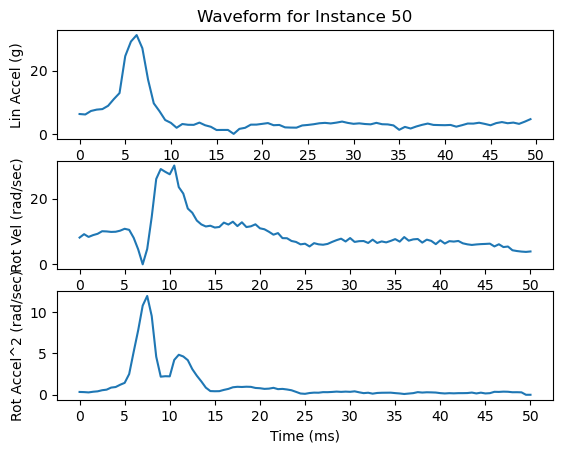

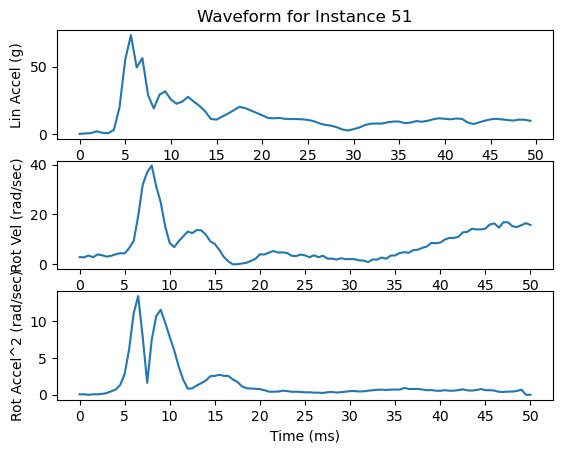

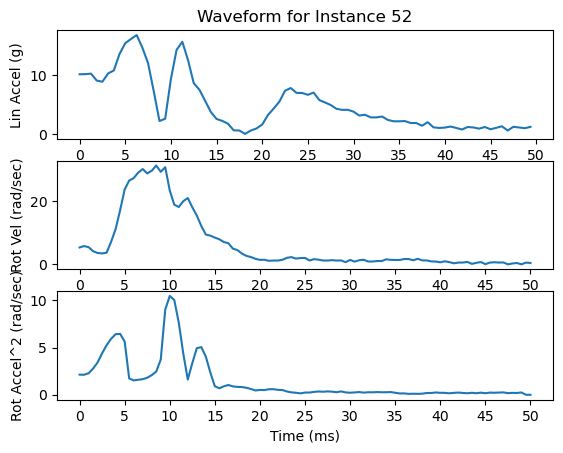

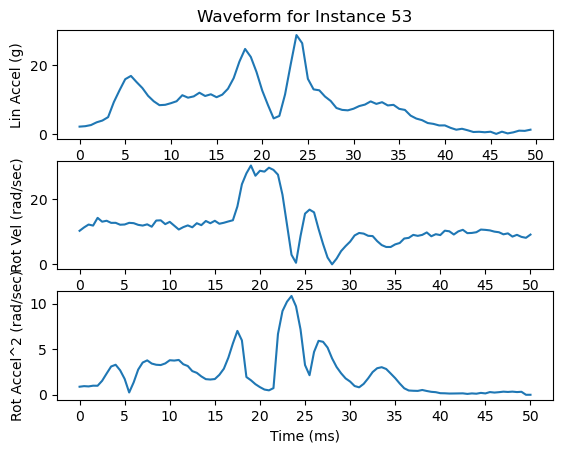

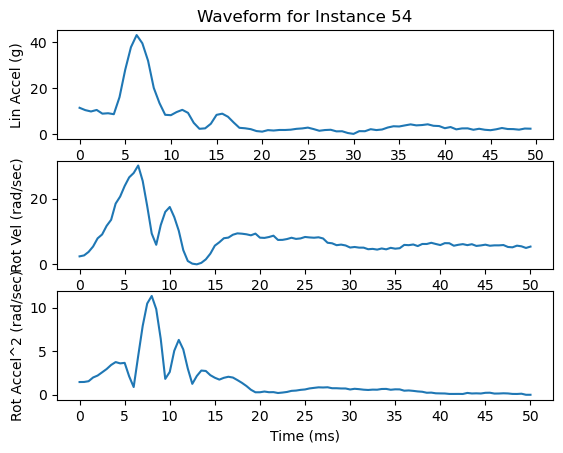

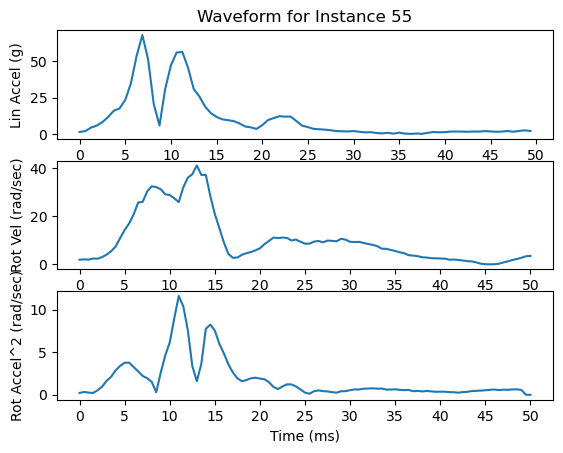

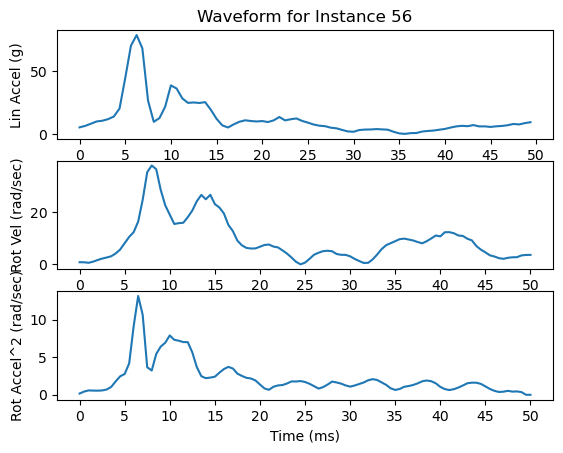

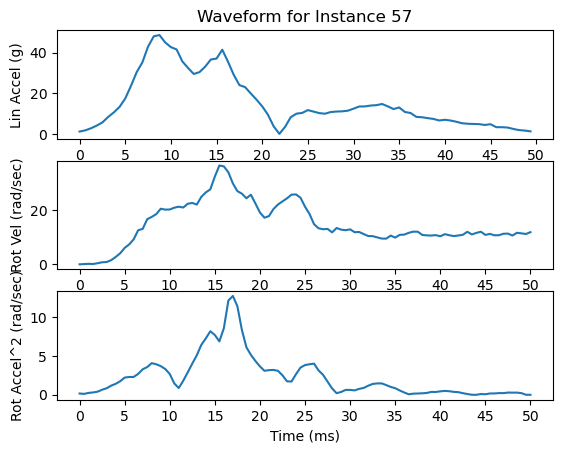

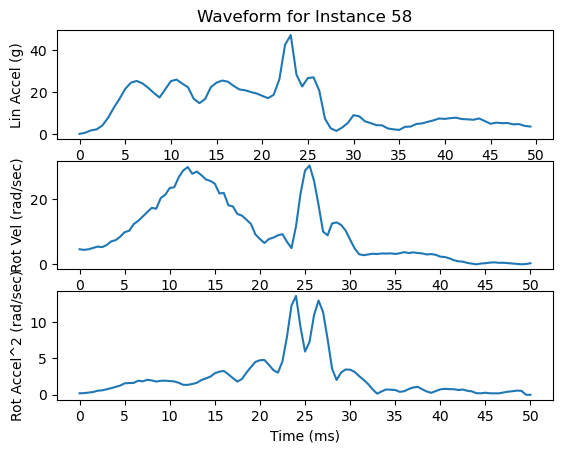

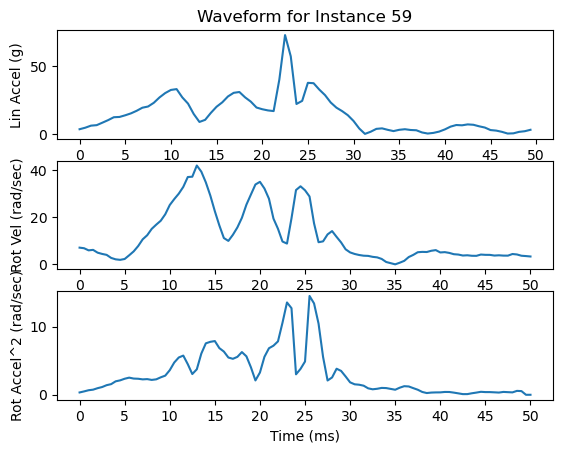

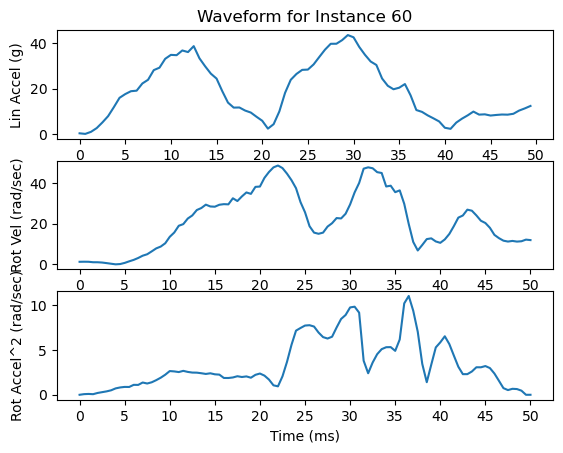

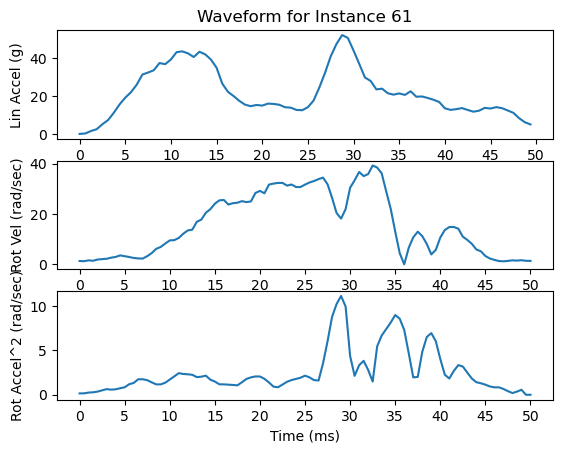

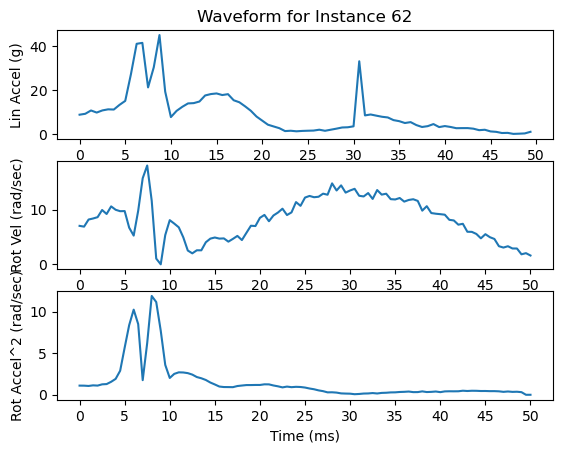

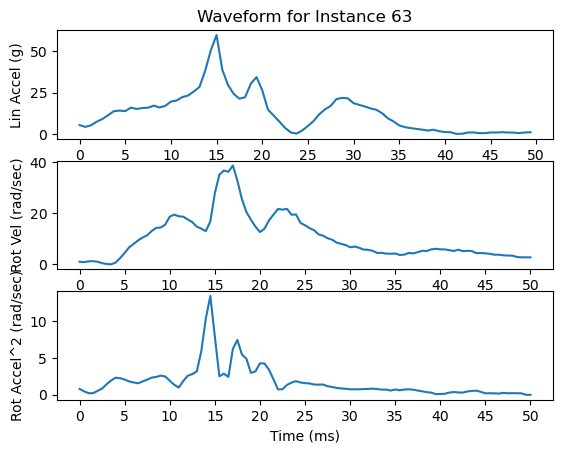

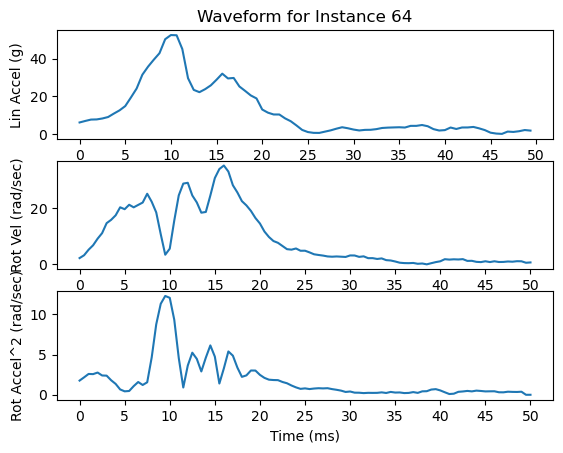

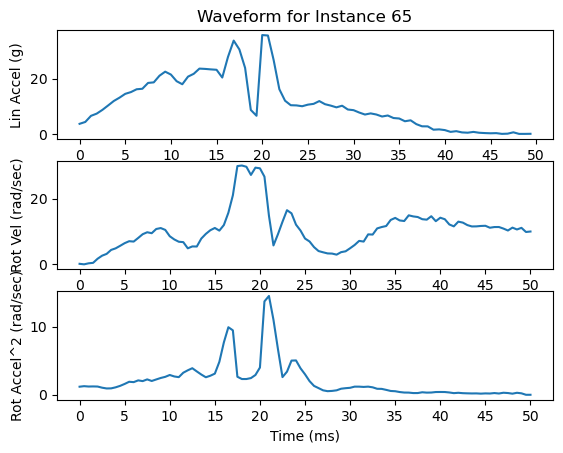

In [14]:
plot_waveforms(LA, RV, RA, TL, TR)

**Ploting all instances together to make it easy to compare**

In [15]:
def plot_waveforms_new(LA, RV, RA, TL, TR) :
    num_instances = len(LA)
    plt.subplot( 311 )
    
    for i in range(0, num_instances) :
        plt.plot(TL, LA[i, :],alpha=0.5)
    plt.title('Waveform for all Instance')
    plt.ylabel('LA (g)')
    #plt.xticks(np.arange(0, 55, step=5))
        
    plt.subplot( 312 )
    for i in range(0, num_instances) :
        plt.plot(TR, RV[i, :],alpha=0.5)
    plt.ylabel('RV (rad/sec)')
    #plt.xticks(np.arange(0, 55, step=5))
              
    plt.subplot( 313 )       
    for i in range(0, num_instances) :
        plt.plot(TR, RA[i, :],alpha=0.5)
    plt.xlabel('Time (ms)')
    plt.ylabel('RA^2 (rad/sec)')
    plt.xticks(np.arange(0, 55, step=5))
    plt.show()

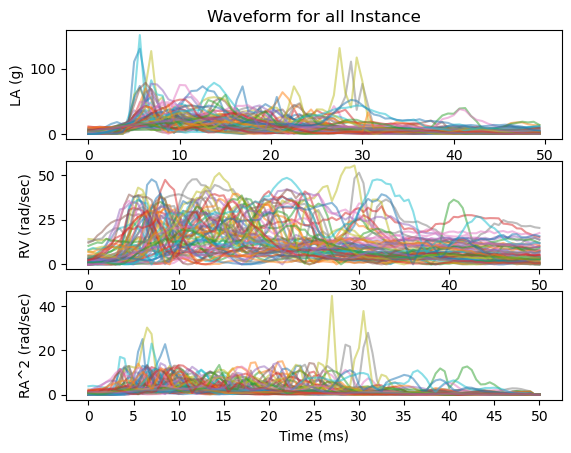

In [16]:
plot_waveforms_new(LA, RV, RA, TL, TR)

## Part 3 – Creating, Analyzing, and Selecting Features

### Feature Calculation

In [17]:
MLA=[] #minimum linear acceleration
ALA=[] #average (mean) linear acceleration
PLA=[] #peak (max) linear acceleration
 
MRV=[]  #minimum rotational velocity
ARV=[] #average (mean) rotational velocity
PRV=[] #peak (max) rotational velocity
 
MRA=[] #minimum rotational acceleration
ARA=[] #average (mean) rotational acceleration
PRA=[] #peak (max) rotational acceleration

def Calculate_features(LA, RV, RA) :
    num_instances = len(LA)
    for i in range(0, num_instances) :
        MLA.append(np.min(LA[i, :]))
        ALA.append(np.mean(LA[i, :]))
        PLA.append(np.max(LA[i, :]))
        MRV.append(np.min(RV[i, :]))
        ARV.append(np.mean(RV[i, :]))
        PRV.append(np.max(RV[i, :]))
        MRA.append(np.min(RA[i, :]))
        ARA.append(np.mean(RA[i, :]))
        PRA.append(np.max(RA[i, :]))
    return MLA,ALA,PLA,MRV,ARV,PRV,MRA,ARA,PRA

In [18]:
MLA,ALA,PLA,MRV,ARV,PRV,MRA,ARA,PRA=Calculate_features(LA, RV, RA)

MLA=np.array(MLA)
ALA=np.array(ALA)
PLA=np.array(PLA)
 
MRV=np.array(MRV)
ARV=np.array(ARV)
PRV=np.array(PRV)
 
MRA=np.array(MRA)
ARA=np.array(ARA)
PRA=np.array(PRA)


### Selection top five of all features

In [19]:
MLA_5=(MLA.argsort()[-5:])
ALA_5=(ALA.argsort()[-5:])
PLA_5=(PLA.argsort()[-5:])
MRV_5=(MRV.argsort()[-5:])
ARV_5=(ARV.argsort()[-5:])
PRV_5=(PRV.argsort()[-5:])
MRA_5=(MRA.argsort()[-5:])
ARA_5=(ARA.argsort()[-5:])
PRA_5=(PRA.argsort()[-5:])

MLA_5_v=MLA[(MLA.argsort()[-5:])]
ALA_5_v=ALA[(ALA.argsort()[-5:])]
PLA_5_v=PLA[(PLA.argsort()[-5:])]
MRV_5_v=MRV[(MRV.argsort()[-5:])]
ARV_5_v=ARV[(ARV.argsort()[-5:])]
PRV_5_v=PRV[(PRV.argsort()[-5:])]
MRA_5_v=MRA[(MRA.argsort()[-5:])]
ARA_5_v=ARA[(ARA.argsort()[-5:])]
PRA_5_v=PRA[(PRA.argsort()[-5:])]

### Summary statistics for each of the nine features

In [20]:
print ('MLA: min {} , max: {}, avg: {}'.format(np.min(MLA), np.max(MLA), np.mean(MLA)))
print ('ALA: min {} , max: {}, avg: {}'.format(np.min(ALA), np.max(ALA), np.mean(ALA)))
print ('PLA: min {} , max: {}, avg: {}'.format(np.min(PLA), np.max(PLA), np.mean(PLA)))

print ('___________________________________')

print ('MRV: min {} , max: {}, avg: {}'.format(np.min(MRV), np.max(MRV), np.mean(MRV)))
print ('ARV: min {} , max: {}, avg: {}'.format(np.min(ARV), np.max(ARV), np.mean(ARV)))
print ('PRV: min {} , max: {}, avg: {}'.format(np.min(PRV), np.max(PRV), np.mean(PRV)))

print ('___________________________________')

print ('MRA: min {} , max: {}, avg: {}'.format(np.min(MRA), np.max(MRA), np.mean(MRA)))
print ('ARA: min {} , max: {}, avg: {}'.format(np.min(ARA), np.max(ARA), np.mean(ARA)))
print ('PRA: min {} , max: {}, avg: {}'.format(np.min(PRA), np.max(PRA), np.mean(PRA)))

print ('___________________________________')


MLA: min 0.0 , max: 0.0, avg: 0.0
ALA: min 4.39519404 , max: 22.2569035, avg: 10.964327359823077
PLA: min 16.8252 , max: 151.7148, avg: 50.71578769230769
___________________________________
MRV: min 0.0 , max: 0.0, avg: 0.0
ARV: min 5.7067274257425735 , max: 23.397538128712867, avg: 10.961333207300836
PRV: min 18.1009 , max: 55.3868, avg: 35.96904461538462
___________________________________
MRA: min 0.0 , max: 0.0, avg: 0.0
ARA: min 1.0092340495049505 , max: 4.418352356435643, avg: 2.0706951779131764
PRA: min 10.3132 , max: 44.5424, avg: 13.493876923076924
___________________________________


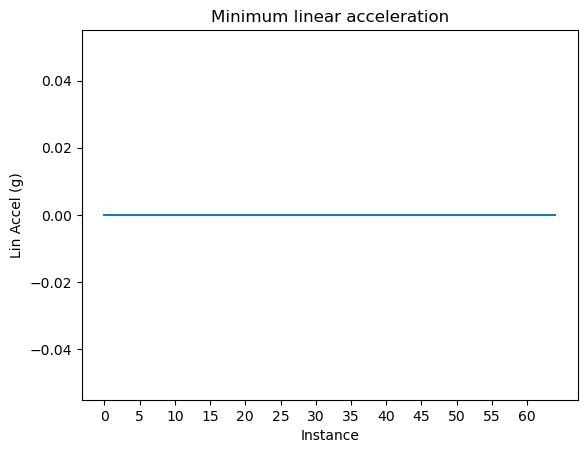

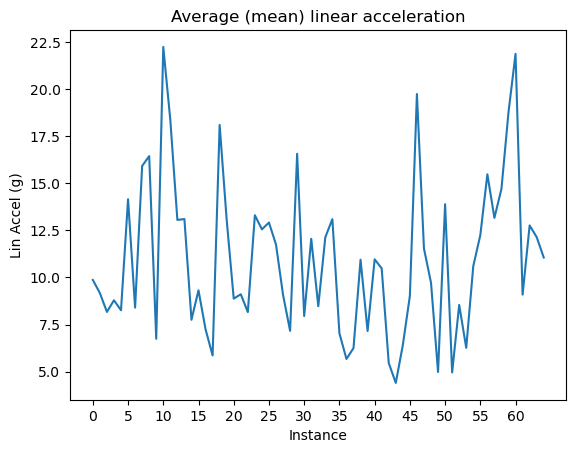

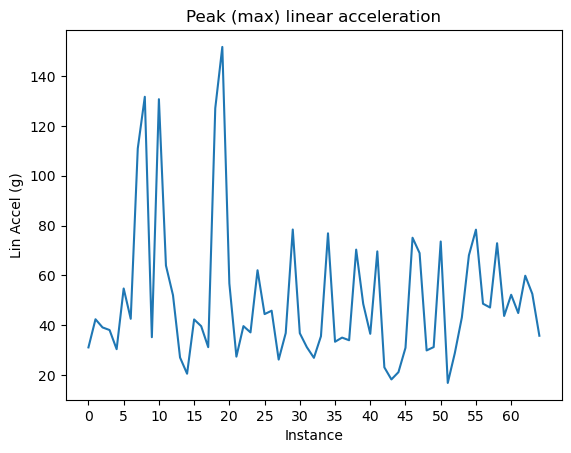

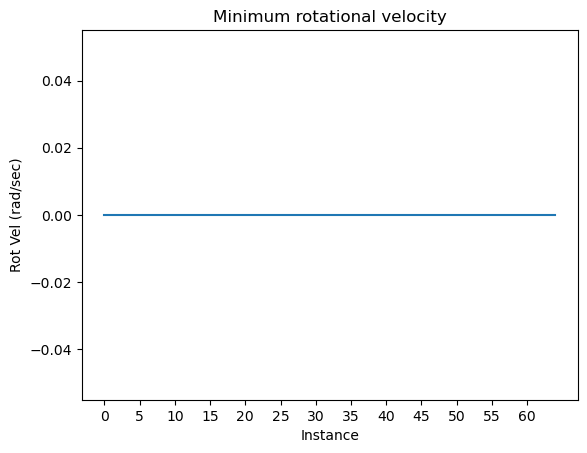

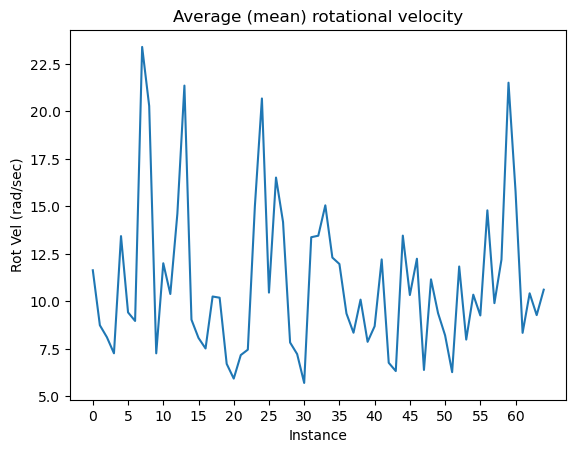

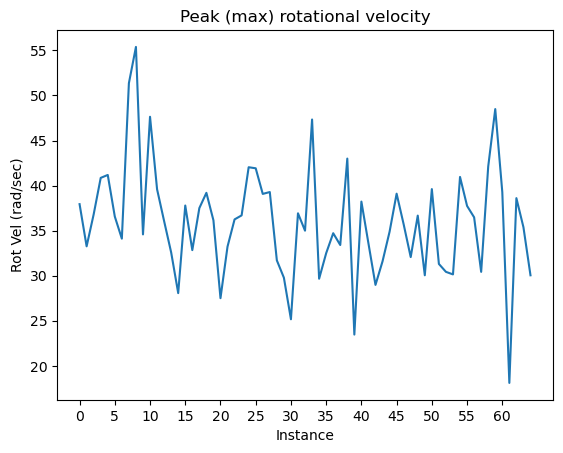

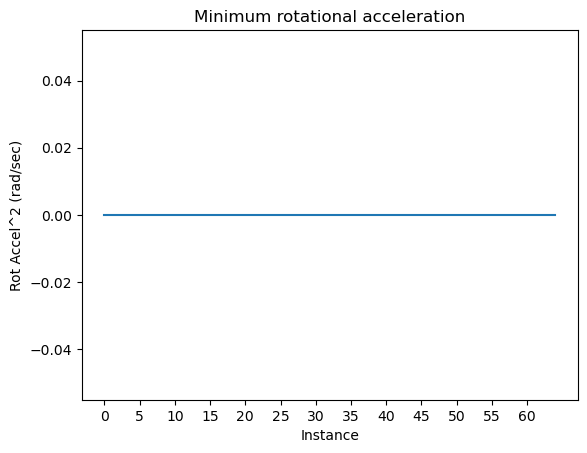

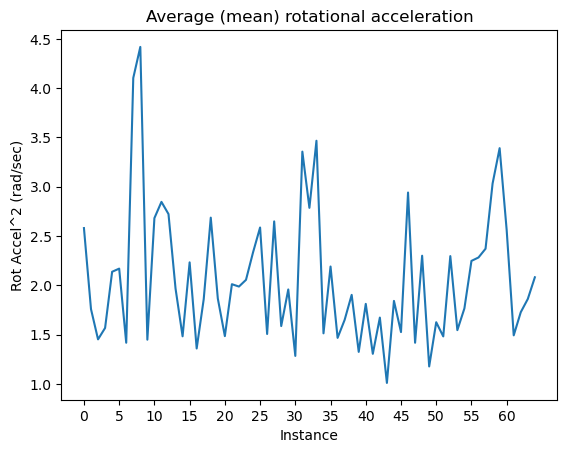

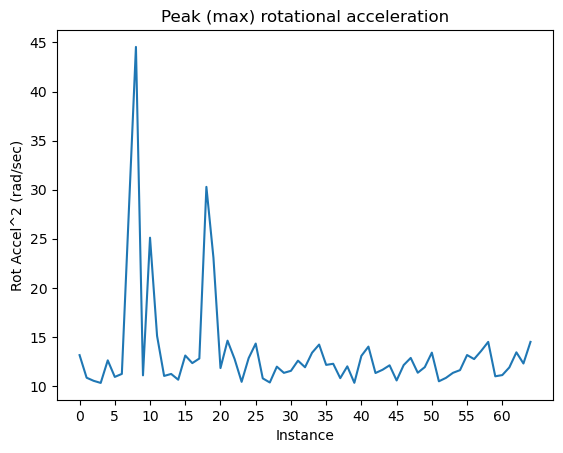

In [21]:
plt.plot(MLA)
plt.title('Minimum linear acceleration')
plt.xlabel('Instance')
plt.ylabel('Lin Accel (g)')
plt.xticks(np.arange(0, 65, step=5))
plt.savefig('MLA.png')
plt.show()
plt.close()

plt.plot(ALA)
plt.title('Average (mean) linear acceleration')
plt.xlabel('Instance')
plt.ylabel('Lin Accel (g)')
plt.xticks(np.arange(0, 65, step=5))
plt.savefig('ALA.png')
plt.show()
plt.close()
plt.plot(PLA)
plt.title('Peak (max) linear acceleration')
plt.xlabel('Instance')
plt.ylabel('Lin Accel (g)')
plt.xticks(np.arange(0, 65, step=5))
plt.savefig('PLA.png')
plt.show()
plt.close()
plt.plot(MRV)
plt.title('Minimum rotational velocity')
plt.xlabel('Instance')
plt.ylabel('Rot Vel (rad/sec)')
plt.xticks(np.arange(0, 65, step=5))
plt.savefig('MR.png')
plt.show()
plt.close()
plt.plot(ARV)
plt.title('Average (mean) rotational velocity')
plt.xlabel('Instance')
plt.ylabel('Rot Vel (rad/sec)')
plt.xticks(np.arange(0, 65, step=5))
plt.savefig('ARV.png')
plt.show()
plt.close()
plt.plot(PRV)
plt.title('Peak (max) rotational velocity')
plt.xlabel('Instance')
plt.ylabel('Rot Vel (rad/sec)')
plt.xticks(np.arange(0, 65, step=5))
plt.savefig('PRV.png')
plt.show()
plt.close()
plt.plot(MRA)
plt.title('Minimum rotational acceleration')
plt.xlabel('Instance')
plt.ylabel('Rot Accel^2 (rad/sec)')
plt.xticks(np.arange(0, 65, step=5))
plt.savefig('MRA.png')
plt.show()
plt.close()
plt.plot(ARA)
plt.title('Average (mean) rotational acceleration')
plt.xlabel('Instance')
plt.ylabel('Rot Accel^2 (rad/sec)')
plt.xticks(np.arange(0, 65, step=5))
plt.savefig('ARA.png')
plt.show()
plt.close()
plt.plot(PRA)
plt.title('Peak (max) rotational acceleration')
plt.xlabel('Instance')
plt.ylabel('Rot Accel^2 (rad/sec)')
plt.xticks(np.arange(0, 65, step=5))
plt.savefig('PRA.png')
plt.show()
plt.close()

## Part 4 – Analyzing Selected Features

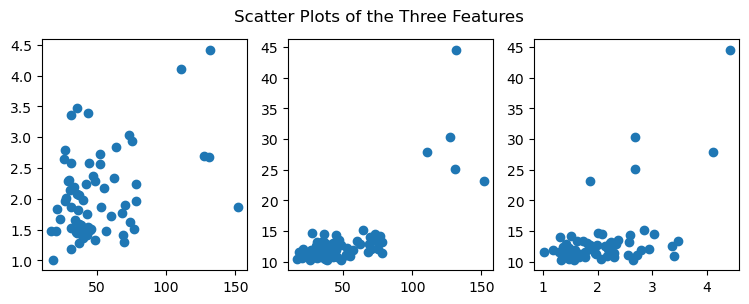

<Figure size 640x480 with 0 Axes>

In [22]:
F1=PLA
F2=ARA
F3=PRA
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.scatter(F1, F2)

plt.subplot(132)
plt.scatter(F1, F3)

plt.subplot(133)
plt.scatter(F2, F3)

plt.suptitle('Scatter Plots of the Three Features')
plt.show()
plt.savefig('Scatter.png')

In [23]:
print(np.sort(PLA_5+1))
print(np.sort(ARA_5+1))
print(np.sort(PRA_5 +1))

[ 8  9 11 19 20]
[ 8  9 32 34 60]
[ 8  9 11 19 20]


 ### Top 5 largest feature values
| Feature           | Instance Numbers | 
| :---------------- | :------: |
| PLA     |  8, 9, 11, 19, 20  | 
| ARA     |  8, 9, 32, 34, 60   | 
| PRA     |  8, 9, 11, 19, 20  |

***

## Essay <a class="anchor" id="num"></a>

##### We have divided the write-up into four portions that cover all the questions asked in the assignment.
##### First, we read and loaded the data from the waveform.csv file. In order to get to know the shape of the three given matrices we printed the shape of all three matrices and we got the shape for each matrix as follows:

- LinearAcceleration (LA): (65, 80) 
- RotationalVelocity (RV): (65, 101)
- RotationalAcceleration (RA): (65, 101)

##### where the first number shows the total number of instances and second shows the number of columns/features.
##### After reading and loading the data we plotted the LA, RV, and RA waveforms for all the instances, here we plotted all three waveforms, for instance, # 01 and this is what it looks like.

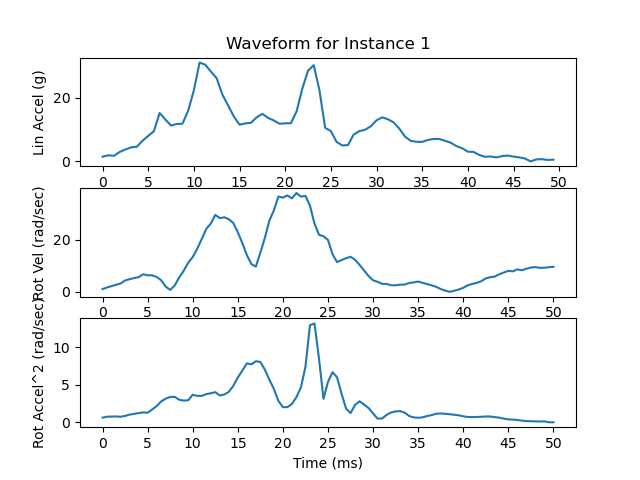

##### After we compared all the combined waveforms for every single instance we noticed that for some instances the peaks are very high as compared to other instances. Moreover, inside a single combined waveform, we also noticed different behavior for all the three sub-waveforms along the time axes. Consider the following two waveforms which are significantly different not only from each other but inside each waveform we can see differences in the sub-waveforms.

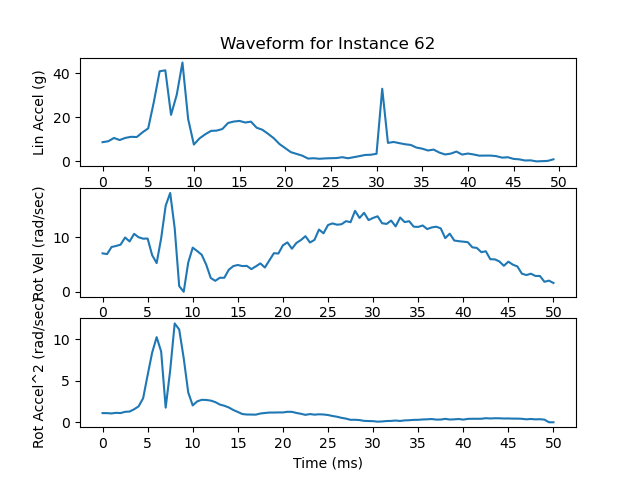

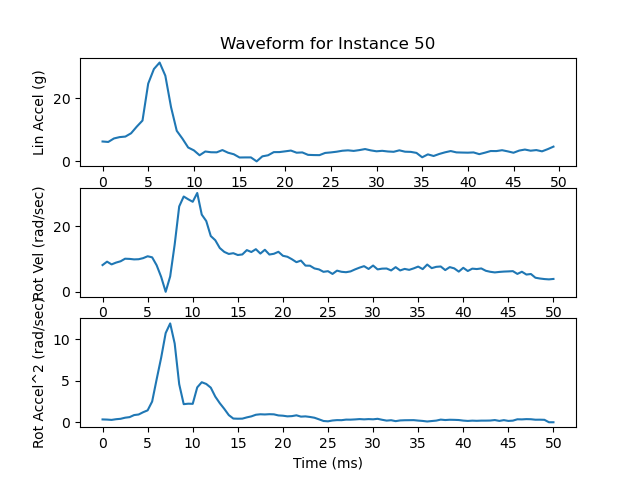

##### Then, in order to get an idea and compare the waveforms to see if they significantly differ from each other we plotted all the individual waveforms in a single frame to improve the visualization and make it easy to compare them. An improved visualization can be seen in the following plots for LA, RV, and RA respectively.  


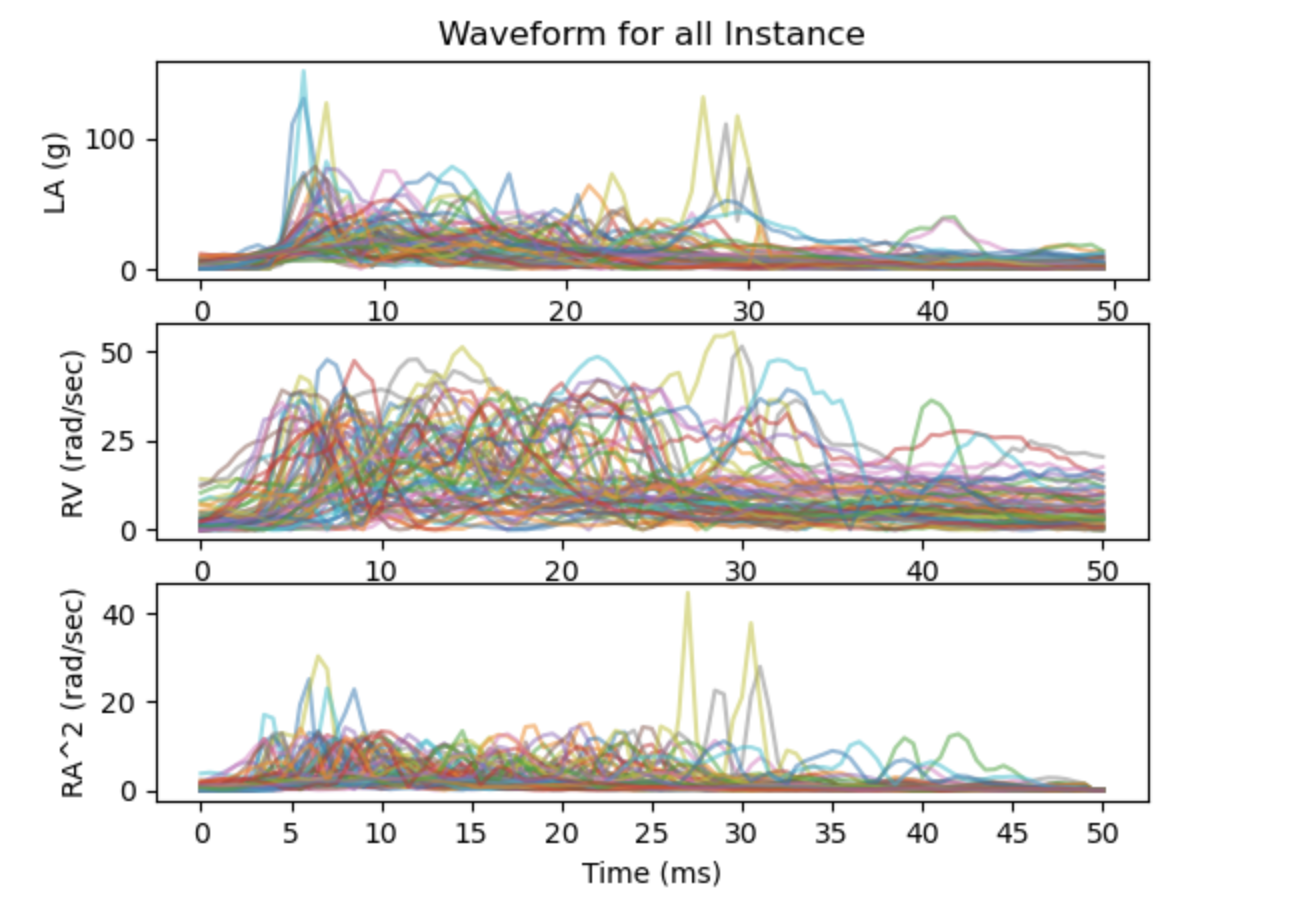

##### We visualized all the nine features in the code section and we also summarized the features-related statistics in part # 03 of the code section. Here for understanding, we plot just one of the features, i.e., Peak (mix) Rotational Acceleration 

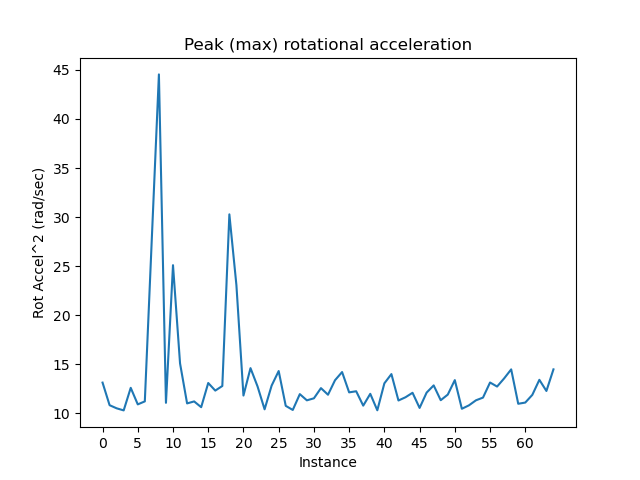

##### When we visualized the nine features where we observed that in the three features, i.e. PLA: peak (max) linear acceleration ARA: average (mean) rotational acceleration and PRA: peak (max) rotational acceleration values for certain instances were significantly different than the other instances. That is why we concluded that these are the three features that can differentiate the normal data instances and the abnormal or "different" data instances.
##### Here we plot all three selected features to show how visually they imply that certain data instances behave differently than the others in the dataset. Observe the peaks in the following plots.
##### Now if we closely observe PLA and PRA both clearly differentiate the abnormal instances from the normal instances. While the other feature, i.e., ARA is slightly less informative for this task. That is why we select PLA and PRA as the most useful features for this scenario.


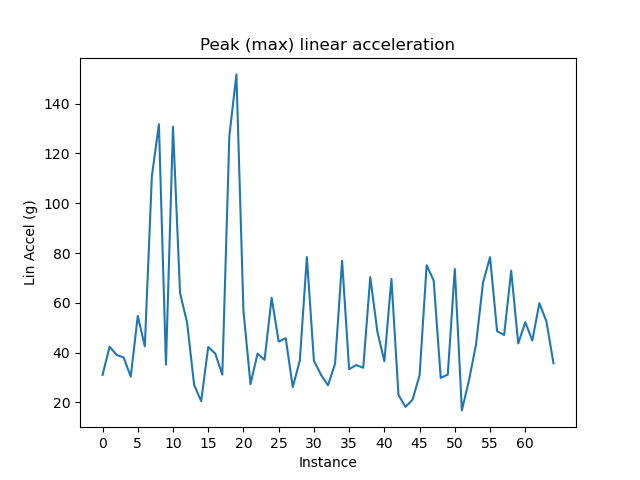
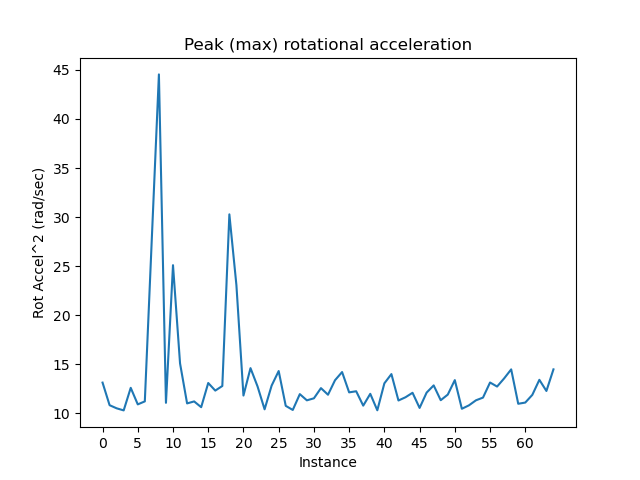
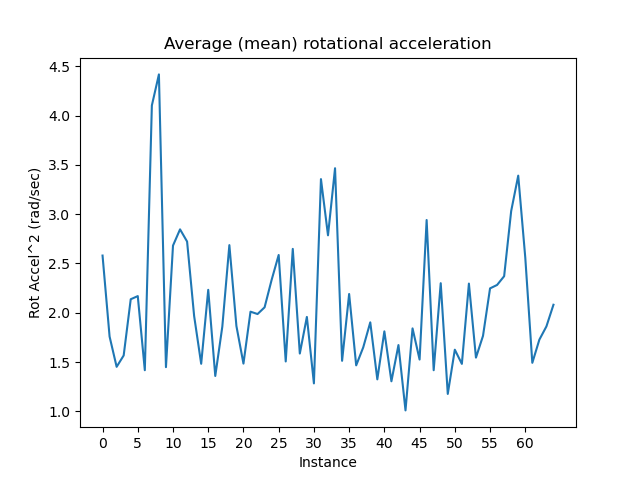

##### For confirmation, we also scatter plot the PLA vs ARA, PLA vs PRA, and ARA vs PRA. From this, we can clearly observe that as compared to the other PLA vs PRA scatter plot, the middle, can effectively determine the five data instances that are "different".

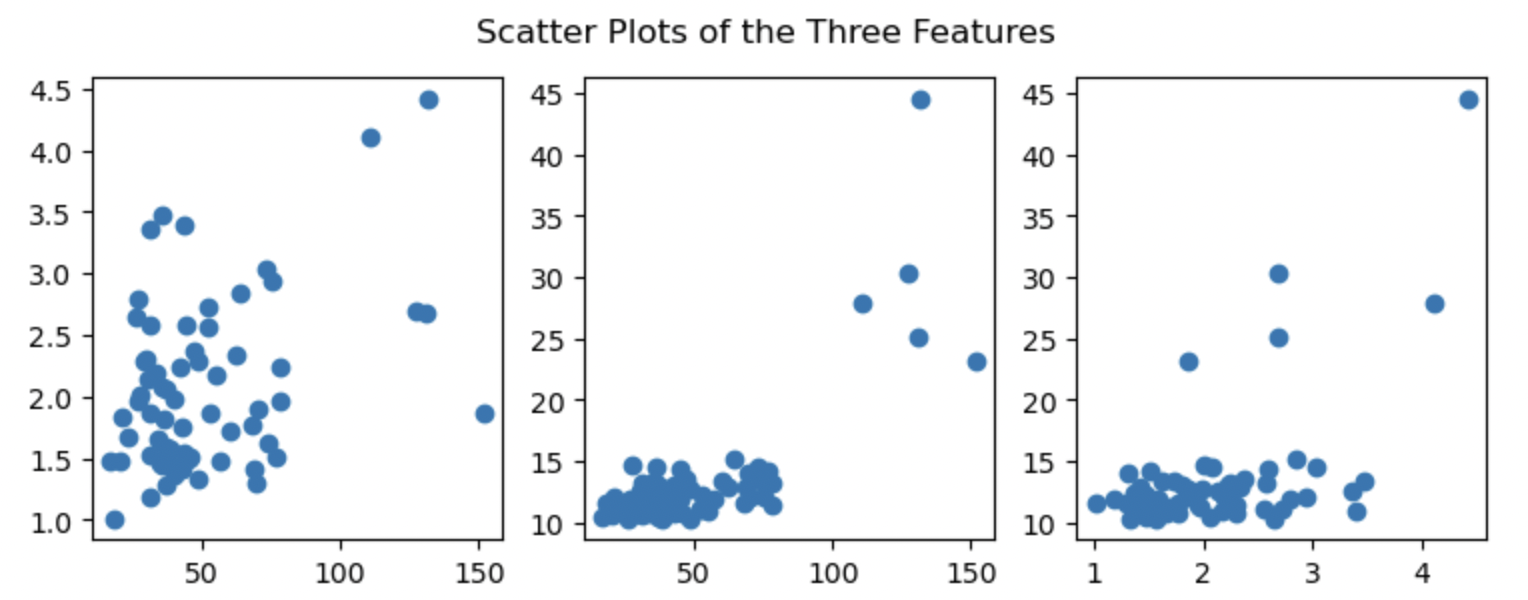

##### We found out the “Top 5” largest feature values for each of the features and noted which data instances they belonged to and then filled out the table below by listing the instance numbers in sorted ascending order.

| Feature           | Instance Numbers | 
| :---------------- | :------: |
| PLA     |  8, 9, 11, 19, 20  | 
| ARA     |  8, 9, 32, 34, 60   | 
| PRA     |  8, 9, 11, 19, 20  |

##### From the above table we picked instance 8 as a "different/abnormal" instance and any of the other 60 instances as a normal instance, say the 40th instance, and plotted the original three features for both of them, i.e. LinearAcceleration (LA), RotationalVelocity (RV), and RotationalAcceleration (RA).
##### Visually clearly we can see how different both these instances are while observing their behavior along the time axis

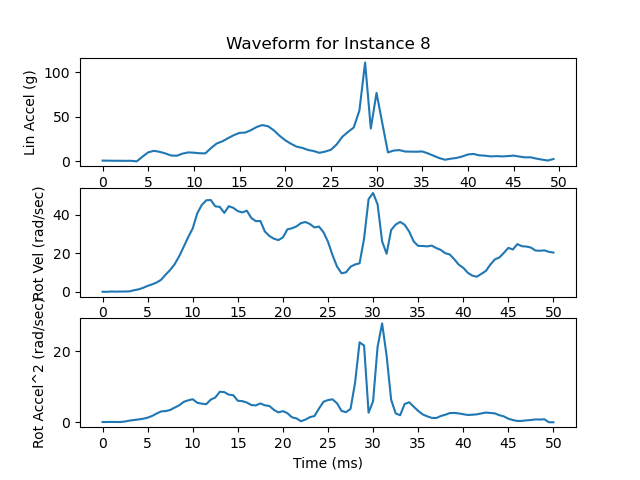
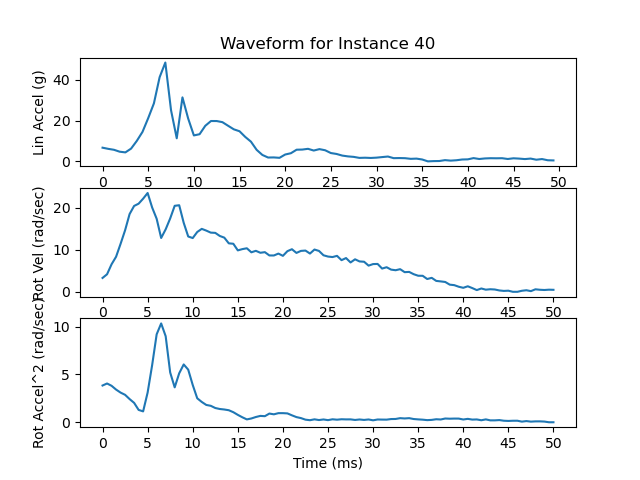